In [1]:
!pip install GeoPandas

     |████████████████████████████████| 972kB 21.0MB/s 
     |████████████████████████████████| 14.8MB 209kB/s 
     |████████████████████████████████| 6.5MB 46.2MB/s 


In [2]:
import geopandas as gpd

In [3]:
coastline_attr_gpd = gpd.read_file("/content/drive/MyDrive/GEO503_AIforGeoApplications/Data/coastline_marine_attr.shp")

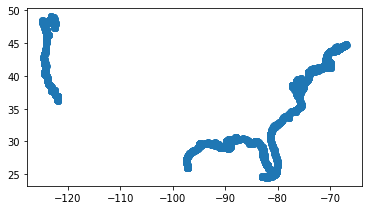

In [4]:
coastline_attr_gpd.plot()

In [5]:
type(coastline_attr_gpd)

geopandas.geodataframe.GeoDataFrame

In [6]:
coastline_attr_gpd.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,geometry
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,POINT (-82.22100 24.50021)
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,POINT (-81.16694 25.14926)
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,POINT (-90.58674 29.24938)
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,POINT (-76.05466 36.96940)
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,POINT (-76.38891 39.27398)


In [7]:
coastline_attr_gpd.shape

(10000, 9)

In [8]:
# geospatial feature engineering

coastline_attr_gpd["lat"] = coastline_attr_gpd["geometry"].y
coastline_attr_gpd["lng"] = coastline_attr_gpd["geometry"].x
coastline_attr_gpd.head()


,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,geometry,lat,lng
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,POINT (-82.22100 24.50021),24.500212,-82.221000
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,POINT (-81.16694 25.14926),25.149262,-81.166938
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,POINT (-90.58674 29.24938),29.249380,-90.586741
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,POINT (-76.05466 36.96940),36.969399,-76.054661
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,POINT (-76.38891 39.27398),39.273977,-76.388908


In [9]:
coastline_data_all = coastline_attr_gpd[["salinity","srtm30","silicate","phosphate","nitrate","disso2","temp","lat","lng"]]
coastline_data_all.head()

,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,lat,lng
0,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,24.500212,-82.221000
1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,25.149262,-81.166938
2,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,29.249380,-90.586741
3,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,36.969399,-76.054661
4,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,39.273977,-76.388908


In [10]:
training_data = coastline_data_all.sample(frac=0.8, random_state=42)  
test_data = coastline_data_all.drop(training_data.index)

In [11]:
training_label = training_data.pop("nitrate")
test_label = test_data.pop("nitrate")

In [12]:
training_data.head()

,salinity,srtm30,silicate,phosphate,disso2,temp,lat,lng
6252,33.1483,-56.1788,17.08550,1.138370,5.36714,9.83431,42.579380,-124.496989
4684,35.7009,-21.0945,1.38960,0.199679,5.05932,21.88080,34.580760,-77.202987
1731,35.4923,-17.9311,2.58428,0.131155,4.91319,23.08300,30.280428,-81.368064
4742,30.8778,-57.5877,15.09390,1.082800,6.37896,9.31756,48.201936,-122.636420
4521,32.6253,-68.5389,4.57709,0.671806,6.41385,7.43766,44.443662,-67.829796


In [13]:
training_data.shape

(8000, 8)

In [14]:
# standarize data
training_stat = training_data.describe().transpose()
training_stat

,count,mean,std,min,25%,50%,75%,max
salinity,8000.0,32.076842,3.840187,12.673200,31.098200,32.422650,34.911700,36.830200
srtm30,8000.0,-23.863390,21.752314,-114.478000,-37.434100,-17.971800,-6.471520,9.989880
silicate,8000.0,5.366715,4.767795,0.883515,2.454580,3.482660,4.285680,17.366300
phosphate,8000.0,0.445437,0.349368,0.057359,0.150106,0.362048,0.604953,1.164930
disso2,8000.0,5.428788,0.673296,4.542900,4.801210,5.138250,6.166140,6.745130
temp,8000.0,16.639811,6.719949,7.092050,9.941270,14.367300,22.998700,26.763200
lat,8000.0,35.850917,7.253365,24.458206,29.442121,36.972908,41.565428,49.069979
lng,8000.0,-89.072117,18.564714,-124.821279,-94.770370,-81.845184,-75.784093,-66.884505


In [15]:
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [16]:
training_data_stded = standarize_data(training_data, training_stat)
test_data_stded = standarize_data(test_data, training_stat)

In [17]:
training_data_stded.head()

,salinity,srtm30,silicate,phosphate,disso2,temp,lat,lng
6252,0.279012,-1.485608,2.457905,1.983390,-0.091562,-1.012731,0.927633,-1.908183
4684,0.943719,0.127292,-0.834162,-0.703435,-0.548746,0.779915,-0.175113,0.639338
1731,0.889399,0.272720,-0.583590,-0.899572,-0.765783,0.958815,-0.767987,0.414984
4742,-0.312235,-1.550378,2.040185,1.824331,1.411225,-1.089629,1.702798,-1.807962
4521,0.142821,-2.053828,-0.165616,0.647939,1.463045,-1.369378,1.184656,1.144231


In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
tf.random.set_seed(42)

dnn_model = keras.models.Sequential([
       keras.layers.Dense(128,activation="relu"),
       keras.layers.Dense(128,activation="relu"),
       keras.layers.Dense(64,activation="relu"),  
       keras.layers.Dense(1),                             
])

dnn_model.compile(optimizer="adam",loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])

history = dnn_model.fit(x=training_data_stded, y=training_label, validation_split=0.2, epochs=50, verbose=0)

In [20]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MAE]')
  plt.legend()
  plt.grid(True)

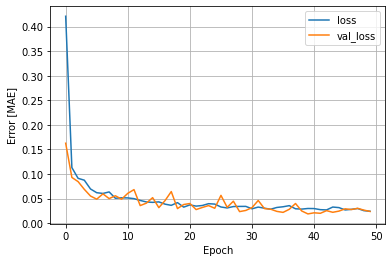

In [21]:
plot_loss(history)

In [22]:
y_pred = dnn_model.predict(test_data_stded)

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
mean_absolute_error(test_label,y_pred)

0.024609675130356543

In [25]:
# Comparison with a linear regression model

from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(training_data_stded,training_label)
y_pred2 = lin_model.predict(test_data_stded)
mean_absolute_error(test_label,y_pred2)


0.17093385659397015

In [26]:
# Comparison with random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf=10, random_state=42)
rf.fit(training_data_stded,training_label)
y_pred3 = rf.predict(test_data_stded)
mean_absolute_error(test_label,y_pred3)

0.0032413272036177403

In [27]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 10.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=69559615a4ef78b396bfb6459bc3c15f32bfcde27d5fa1ba0ad8d8dde4131695
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=6a1737df01ee78eade89fe18a61b483620b0abf048f4f6a65e82bb3865a619cc
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [28]:
# Hyperparameter tuning

def build_model(hp):
  model = keras.models.Sequential()
  for i in range(hp.Int("num_layer",1,8)):
    model.add(keras.layers.Dense(units=hp.Int("neuron_"+str(i),16,128, step=32), activation="relu"))
  model.add(keras.layers.Dense(1))

  model.compile(optimizer="adam",loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
  return model

  

In [29]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective="val_loss", max_trials=5, seed=42)

In [30]:
tuner.search(training_data_stded, training_label, validation_split=0.2, epochs=5)

Trial 5 Complete [00h 00m 03s]
val_loss: 0.06036911904811859

Best val_loss So Far: 0.06036911904811859
Total elapsed time: 00h 00m 15s
INFO:tensorflow:Oracle triggered exit


In [32]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layer: 7
neuron_0: 80
neuron_1: 80
neuron_2: 48
neuron_3: 16
neuron_4: 16
neuron_5: 112
neuron_6: 80
neuron_7: 112
Score: 0.06036911904811859
Trial summary
Hyperparameters:
num_layer: 4
neuron_0: 48
neuron_1: 112
neuron_2: 48
neuron_3: 80
neuron_4: 16
Score: 0.06690361350774765
Trial summary
Hyperparameters:
num_layer: 4
neuron_0: 48
neuron_1: 112
neuron_2: 80
neuron_3: 112
neuron_4: 16
Score: 0.07363893836736679
Trial summary
Hyperparameters:
num_layer: 5
neuron_0: 16
neuron_1: 16
neuron_2: 16
neuron_3: 16
neuron_4: 16
Score: 0.0839233323931694
Trial summary
Hyperparameters:
num_layer: 8
neuron_0: 16
neuron_1: 80
neuron_2: 48
neuron_3: 48
neuron_4: 80
neuron_5: 16
neuron_6: 16
neuron_7: 16
Score: 0.08615695685148239


In [33]:
dnn_model = keras.models.Sequential([
       keras.layers.Dense(80,activation="relu"),
       keras.layers.Dense(80,activation="relu"),
       keras.layers.Dense(48,activation="relu"),
       keras.layers.Dense(16,activation="relu"),
       keras.layers.Dense(16,activation="relu"), 
       keras.layers.Dense(112,activation="relu"), 
       keras.layers.Dense(80,activation="relu"), 
       keras.layers.Dense(112,activation="relu"), 
       keras.layers.Dense(1)
       ])


dnn_model.compile(optimizer="adam",loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])

history = dnn_model.fit(x=training_data_stded, y=training_label, validation_split=0.2, epochs=50, verbose=0)

In [34]:
y_pred = dnn_model.predict(test_data_stded)
mean_absolute_error(test_label,y_pred)

0.06023966187162732

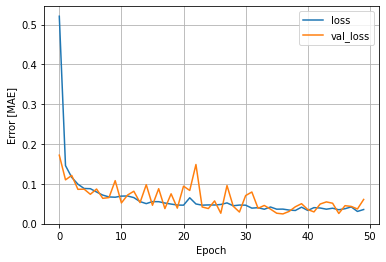

In [35]:
plot_loss(history)

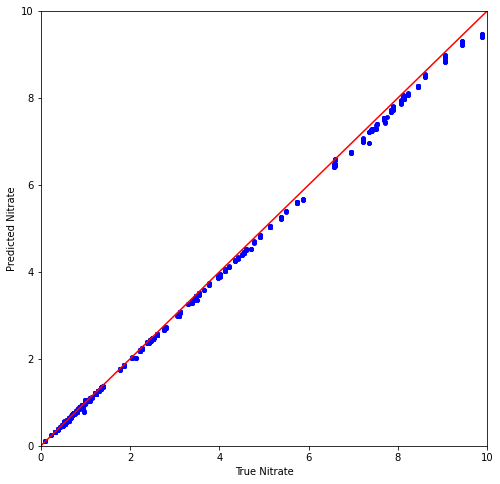

In [36]:
# Prediction scatter plot
plt.figure(figsize=(8,8))
plt.scatter(test_label, y_pred, s=15, c='blue')
plt.xlabel("True Nitrate")
plt.ylabel("Predicted Nitrate")
lim = [0,10]
plt.xlim(lim)
plt.ylim(lim)
refernce_line = plt.plot(lim,lim, "r-")

In [38]:
# Save model
dnn_model.save('/content/drive/MyDrive/Demo/my_dnn_model.h5')

In [39]:
new_model = keras.models.load_model('/content/drive/MyDrive/Demo/my_dnn_model.h5')

In [40]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 80)                720       
_________________________________________________________________
dense_9 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_10 (Dense)             (None, 48)                3888      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                784       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 112)               1904      
_________________________________________________________________
dense_14 (Dense)             (None, 80)               